# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:
1) Определить рыночную стоимость объектов недвижимости.
2) Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3) Установить, какие факторы влияют на ценообразование стоимости квартиры.

**Ход исследования:**
Данные я получу  из файла '/datasets/real_estate_data.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования проверим данные на ошибки. Выясним их влияние и по возможности исправим. проведем исследовательский анализ.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

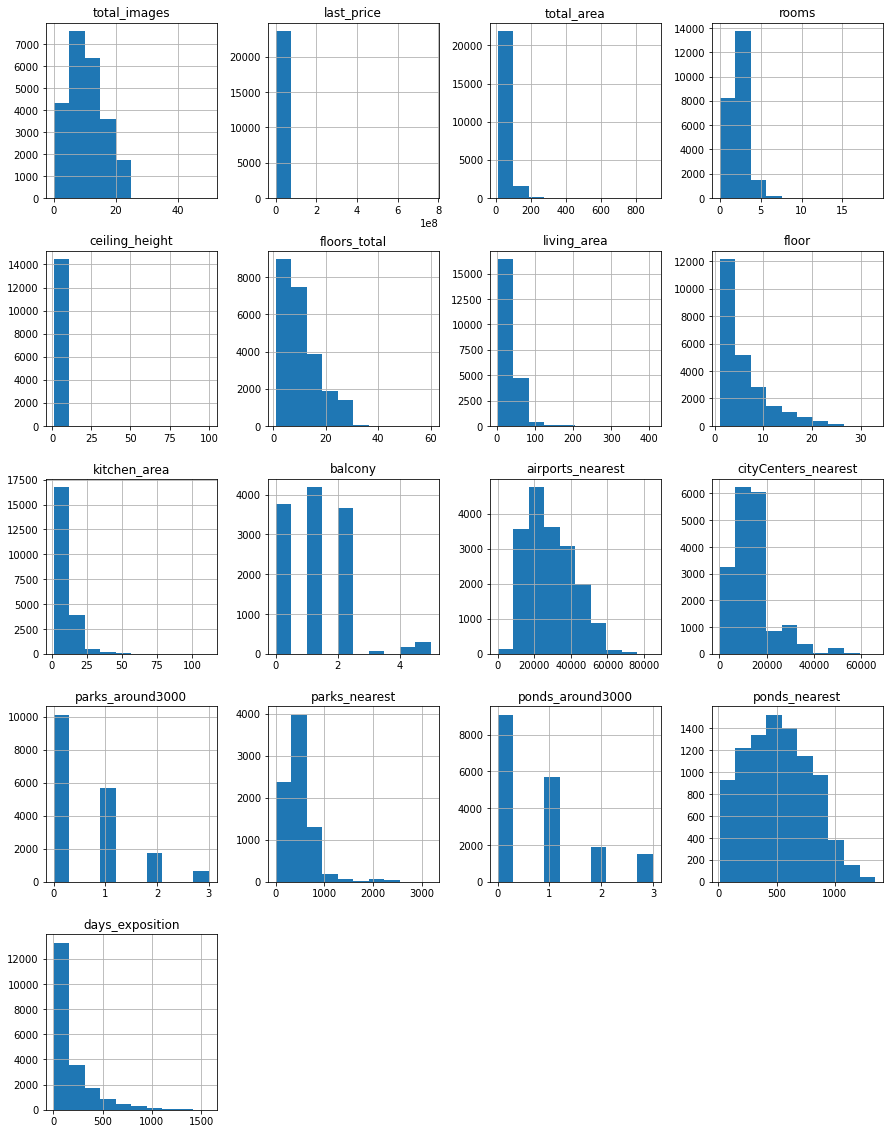

In [3]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах

In [4]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**В 14 из 22 двух столбцах есть пропущенные значения**

обратим внимание на столбцы, в которых пропуски можно заменить, например:
<ul>
<li> balcony -  скорее всего, в квартире нет балкона, заменим пропуск на 0 </li>
<li> is_apartment - скорее всего, это не апартаменты, заменим на False </li>
<li> kitchen_area - если квартира соответсвует студии, то заменяем значение в колонке на 0 </li>   
<li> locality_name - количество пропусков мало по сравнению с общим количеством данных, строки с пропусками можно удалить </li>
<li> floors_total - количество пропусков мало по сравнению с общим количеством данных, строки с пропусками можно удалить </li>
</ul>   


В остальных случаях корректней оставить пропуск.

Пропуски могли возникнуть так как какие-то данные просто не заполнили (жилая площадь, количество этажей, название населенного пункта) или данные характеристики отсутствуют у квартиры(аэропорта, парков и прудов рядом нет)Пропуски в days_exposition, возможно означают, что объявление так и не закрыли
 

In [5]:
data['is_apartment'] = data['is_apartment'].fillna('False')

In [6]:
data['balcony'] = data['balcony'].fillna(0)

In [7]:
data.loc[(data['kitchen_area'].isna() == True) & (data['studio'] == True), 'kitchen_area'] = 0

In [8]:
data = data.dropna(subset = ['floors_total'])

In [9]:
data = data.dropna(subset = ['locality_name'])

Если пропускков меньше 5-10% их лучше сразу удалить

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2076
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Рассмотрите типы данных в каждом столбце:

In [11]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Изменим тип для столбцов:
<ul>
<li> last_price на int, для сравнения цен нам нужны только целые значения, цифры после запятой существенно не влияют на показатель, так же мы экономим память  </li>
<li> floors_total на int, для дальнейшего сравнения с этим столбцом </li>
<li> first_day_exposition на date, для наглядности и комфортной работы с датами </li>
<li> is_apartment на bool, для экономии памяти и работы со значениями как с булевскими переменными  </li>

</ul>

In [12]:
data['last_price'] = data['last_price'].astype(int)

In [13]:
data['floors_total'] = data['floors_total'].astype(int)

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [15]:
data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True})

In [16]:
data['balcony'] = data['balcony'].astype(int)
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Изучите уникальные значения в столбце:


In [17]:
# количество уникальных значений в locality_name
data['locality_name'].unique().shape[0]

364

In [18]:
# проверяем наличие неявных дубликатов, устараняем их возможные варианты
# 1 меняем ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# 2 меняем "городской поселок" на "поселок городского типа"
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))
len(data.locality_name.unique())

323

Количестов неявных дубликатов уменьшилось

#### Найдите и устраните редкие и выбивающиеся значения.


Проанализируем данные, с помощью функции describe(), обратим внимание на минимальные и максимальные значения столбцов.


In [19]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21489.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.489241,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.944202,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Рассмотрим каждый столбец в отдельности. Обратим внимание на выбросы.


**total_images**

<AxesSubplot:>

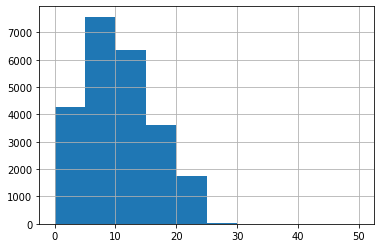

In [20]:
data['total_images'].hist()
#выбросов нет, распределение выглядит адекватно

**last_price**

имеет странный минимум  и максимму, посмотрим количество таких значений, если их число мало(< 236(1% от общего числа)),то удалим их 
* принимаем значения квартиры от 500.000 до 30.000.000 рублей

In [21]:
data.query('last_price < 5e+05')['last_price'].count() # 1 квартира
data.query('last_price > 3e+07')['last_price'].count() # 183 квартиры

data.drop(index=data.query('last_price < 5e+05').index,inplace=True)
data.drop(index=data.query('last_price > 3e+07').index,inplace=True)

<AxesSubplot:>

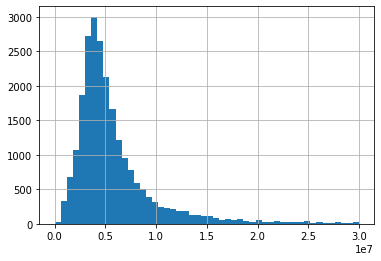

In [22]:
data['last_price'].hist( bins=50, range=(0,3e+07))
#выбросов нет

**total_area**

имеет странный максимму, посмотрим количество таких значений, если их число мало(< 236(1% от общего числа)),то удалим
* принимаем значения квартиры от 10 до 200 кв.м

<AxesSubplot:>

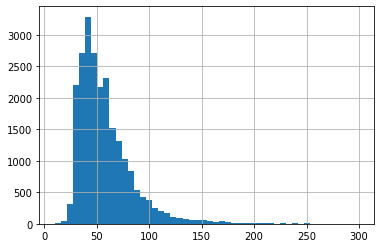

In [23]:
data.query('total_area > 300')['total_area'].count() # 12 квартира
data['total_area'].hist(bins=50, range=(10,300))

**rooms**

имеет странный максимум (19 комнат, похоже это целый отель)), посмотрим количество таких значений, если их число мало(< 236(1% от общего числа)),то удалим
* принимае значения квартиры от 1 до 5 комнат

<AxesSubplot:>

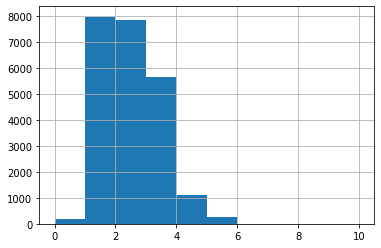

In [24]:
data.query('rooms > 5')['rooms'].count() # 134 квартиры
data.drop(index=data.query('rooms > 5').index,inplace=True)
data['rooms'].hist(bins=10, range=(0,10))

**ceiling_height**

Высота потолков в России регламинтирована, они не могут буть ниже 2.5 метров, так же значения высоты потолков, которые выше 4 и 36 метров кажутся подозрительными, избавимся от них. Предположим, что 25м = 2.5м,а 36м = 3.6м, заменим эти значения.
* принимае адекватные значения квартиры с высотой потолка от 2.5 до 4 метров

In [25]:
data.query('ceiling_height < 2.5')['ceiling_height'].count() # 73 квартирa
data.query('ceiling_height > 4 and ceiling_height < 25')['ceiling_height'].count() #40
data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count() #19
data.query('ceiling_height > 36')['ceiling_height'].count() #1

1

<AxesSubplot:>

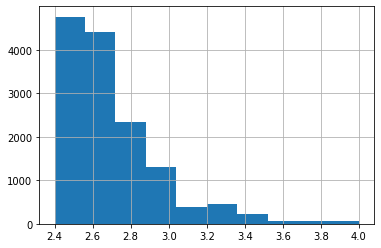

In [26]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

data['ceiling_height'].hist(bins=10, range=(2.4,4))

**floors_total**

Нет выбевающихся значений, минимум и максимум подозрений не вызывают

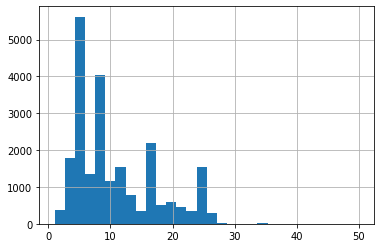

In [27]:
data['floors_total'].hist(bins=30, range=(1,50));

**living_area**

имеет странный максимум возможно, квартиры с большой площадью продаются для специальных целей или относятся к категории элитного жилья.
* принимае адекватные значения квартиры от 10 до 200 кв.м

In [28]:
data.query('living_area < 10')['living_area'].count() #24
data.query('living_area > 200')['living_area'].count() #4


0

<AxesSubplot:>

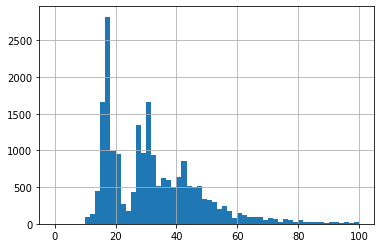

In [29]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

data['living_area'].hist(bins=60, range=(0,100))

**floor**

Нет выбевающихся значений, минимум и максимум подозрений не вызывают

<AxesSubplot:>

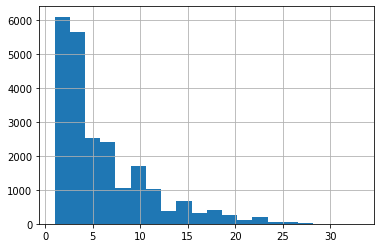

In [30]:
data.query('floor > floors_total')['floor'].count() #0
data['floor'].hist(bins=20)

**kitchen_area**

имеет странный максимум и минимум возможно, кухни с размером менее 2 кв.м очень маленькие, наверное произошла ошибка при вводе данных. удалим строки с кухнами менее 2кв.м. и больше 50кв.м.
* принимае адекватные размеры кухни от 2 до 50 кв.м

In [31]:
data.query('kitchen_area < 2')['kitchen_area'].count() #144
data.query('kitchen_area > 50')['kitchen_area'].count() #17
data.query('kitchen_area > total_area')['kitchen_area'].count()


0

<AxesSubplot:>

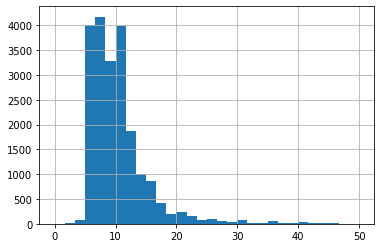

In [32]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)
data['kitchen_area'].hist(bins=30, range=(0,50))

**balcony**

Нет выбевающихся значений, минимум и максимум подозрений не вызывают

<AxesSubplot:>

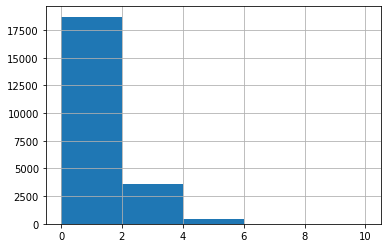

In [33]:
data['balcony'].hist(bins=5, range=(0,10))

**days_exposition**

Видим, что в целом график нормальный. Нулевых значений нет. Объявления, которые висели дольше 3-х лет отбросим, так как их не много и скорее всего они потеряли свою актуальность.

<AxesSubplot:>

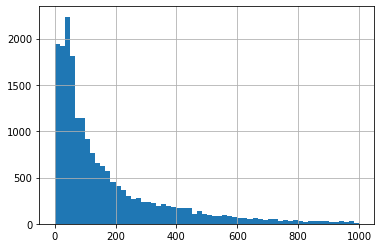

In [34]:
data.query('days_exposition > 365*3')['days_exposition'].count()#160
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)
data['days_exposition'].hist(bins=60, range=(0,1000))

**airports_nearest;	city_centers_nearest;	parks_around3000;	parks_nearest;	ponds_around3000;	ponds_nearest**

Эти данные собраны автоматизированно. По гистогрммам в начале выглядят адекватно. МИнимум и Максимум подозрений не вызывают . Выбивается одна строчка в airports_nearest (расстояние от аэропорта 5 км). Её надо удалить. 

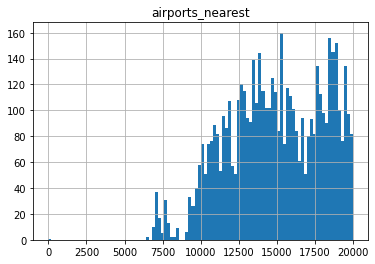

In [35]:
data.query('airports_nearest < 8000')['airports_nearest'].count()
data.hist('airports_nearest', bins=100, range=(0,20000));

<div class="alert alert-info"> Проверяем на явные дубликаты:

In [36]:
data.duplicated().sum()
#явных дубликатов нет

0

Cбросим индексацию после удаления строк.

In [37]:
data.reset_index(drop=True,inplace=True)

<div class="alert alert-info">
<b>Вывод:</b>  Представленные данные имели выбросы,которые в процессе обработки мы удалили, получили 22646 строк вместо 23699 исходных, около 1000 строк отсеились. Принимаем эту разницу не критической и считаем, что исходные данные были качественными 

### Посчитайте и добавьте в таблицу новые столбцы

#### цена одного квадратного метра

In [38]:
data['price_one_sqm'] = data['last_price'] / data['total_area']
data['price_one_sqm']

0        120370.370370
1         82920.792079
2         92785.714286
3        100000.000000
4         95065.789474
             ...      
22641     72490.845228
22642     52542.372881
22643     44091.710758
22644    149511.400651
22645     41795.665635
Name: price_one_sqm, Length: 22646, dtype: float64

#### день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [39]:
data['dayofweek_public'] = data['first_day_exposition'].dt.dayofweek
data['dayofweek_public']

0        3
1        1
2        3
3        1
4        0
        ..
22641    1
22642    0
22643    6
22644    1
22645    4
Name: dayofweek_public, Length: 22646, dtype: int64


#### месяц публикации объявления

In [40]:
data['month_public'] = data['first_day_exposition'].dt.month

#### год публикации объявления

In [78]:
data['first_day_exposition'].dt.date #приводим к временному формату
data['first_day_exposition'].astype('datetime64[M]') 

0       2019-03-01
1       2018-12-01
2       2015-08-01
3       2018-06-01
4       2018-09-01
           ...    
22641   2017-03-01
22642   2018-01-01
22643   2018-02-01
22644   2017-03-01
22645   2017-07-01
Name: first_day_exposition, Length: 22646, dtype: datetime64[ns]

In [42]:
def floor_type (floor):
    if floor['floors_total'] > 1:
        if floor['floors_total'] == floor['floor'] :
            return 'последний'
        elif floor['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
        
data['floor_type'] = data.apply(floor_type, axis =1)
data['floor_type']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
22641    другой
22642    другой
22643    первый
22644    другой
22645    первый
Name: floor_type, Length: 22646, dtype: object

#### расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [43]:
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
data['city_centers_nearest_km']

0        16.0
1        19.0
2        14.0
3         8.0
4         NaN
         ... 
22641     4.0
22642     NaN
22643     NaN
22644    10.0
22645     NaN
Name: city_centers_nearest_km, Length: 22646, dtype: float64

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:

##### общая площадь

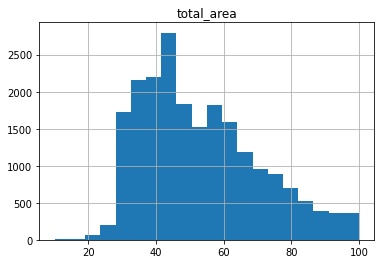

In [44]:
data.hist('total_area', bins=20, range=(10,100));

Похоже на Гаусовское распределение. Больше всего квартир с площадью от 30 до 60 кв.м после этой отметки наблюдается снижение предложений

##### жилая площадь

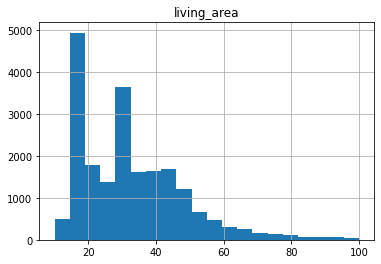

In [45]:
data.hist('living_area', bins=20, range=(10,100));

Жилая площадь имеет два наиболее часто встречающихся значения, это пик в 18 кв.м и пик в 30 кв.м ;
меньше всего квартир с площадью больше 50 кв.м

##### площадь кухни

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

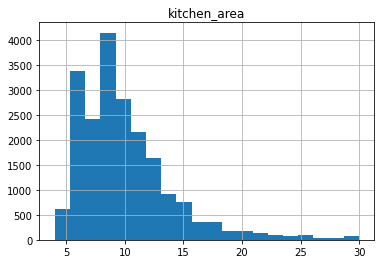

In [46]:
data.hist('kitchen_area', bins=20, range=(4,30))

Больше всего распространены квартиры с маленькими кухнями, площадью от 5 до 12 кв.м

##### цена объекта

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

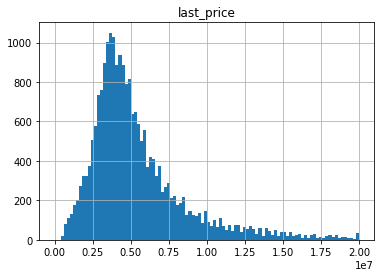

In [47]:
data.hist('last_price', bins=100, range=(0,2e+07))

в среднем цена за квартиру варьируется от 2500000 до 6000000 рублей

##### количество комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

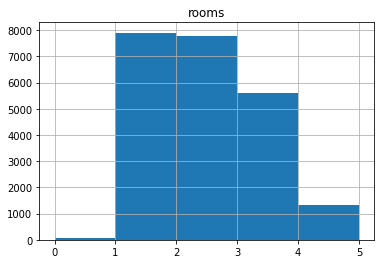

In [48]:
data.hist('rooms', bins=5)

Больше всего двух и трёх-комнатных квартир

##### высота потолков

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

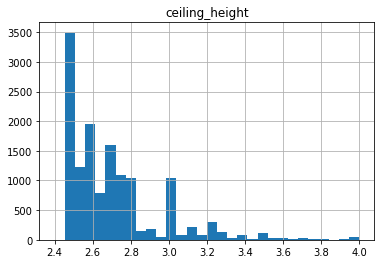

In [49]:
data.hist('ceiling_height', bins=30, range = (2.4,4))

Большинство квартир имеют высоту потолка в 2.5м, высота больше 3 метров наблюдается редко

##### этаж квартиры

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

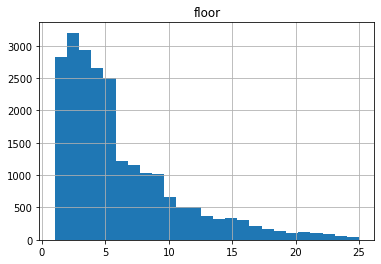

In [50]:
data.hist('floor', bins=25, range=(1,25))

Больше всего квартир расположено с 1 по 5 этаж, почти в 2.5 раза меньше квартир находится с 6 по 12 этаж, квартир на высоких этажах представлено меньше

##### тип этажа квартиры («первый», «последний», «другой»)

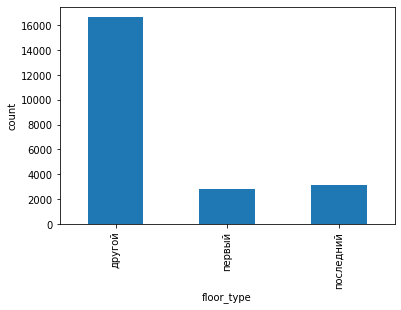

In [51]:
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count');

На первом и последнем этаже меньше всего продаваемых квартир, логично что на других этажах больше вариантов


##### общее количество этажей в доме

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

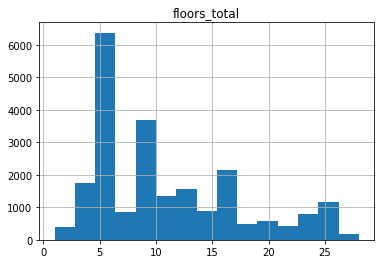

In [52]:
data.hist('floors_total', bins=15, range = (1,28))

Так как Санкт-Петербург исторический город, а все рядом находящиеся города и поселки не отличаются большим количеством населения, логично что большинство домов в этих местах не являются многоэтажными. 

Пики наблюдаются среди 5-и, 9-и и 16-и этажных домов

##### расстояние до центра города в метрах

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

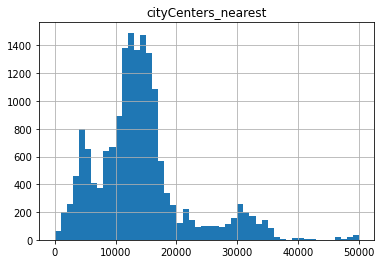

In [53]:
data.hist('cityCenters_nearest', bins=50, range=(0,50000))

Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км, возможно на этом расстояние расположены какие-то поселки или район с ЖК

##### расстояние до ближайшего аэропорта

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

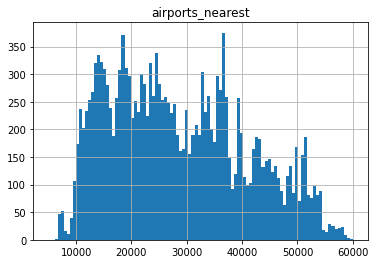

In [54]:
data.hist('airports_nearest', bins=100, range = (5000, 60000))

аэропорт в Санкт-Петербурге один, поэтому все расстояния указаны относительно него. Гистограмма выглядит адекватно


##### расстояние до ближайшего парка

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

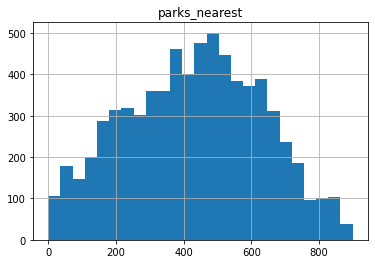

In [55]:
data.hist('parks_nearest', bins=25,range=(0,900))

Распределение похоже на нормальное, так мы понимаем, что в среднем квартиры находятся на расстоянии от 200 до 700 метров от парка 

##### день и месяц публикации объявления

array([[<AxesSubplot:title={'center':'dayofweek_public'}>]], dtype=object)

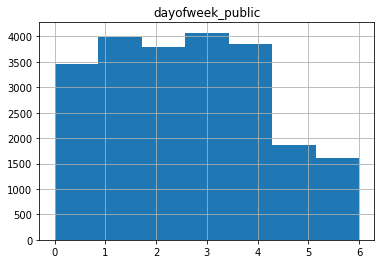

In [56]:
data.hist('dayofweek_public', bins=7)

Большинство квартир опубликовали в будние дни, можно связать это с тем, что риэлторские компании, которые помогают в продажах квартир работаю чаще всего побудням

array([[<AxesSubplot:title={'center':'month_public'}>]], dtype=object)

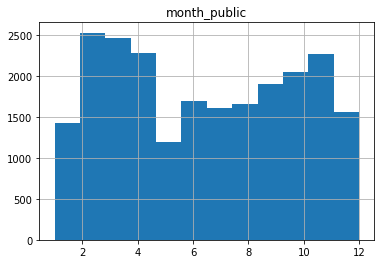

In [57]:
data.hist('month_public', bins=12)

Большинсвто квартир опубликовали весной, так же есть тенденция продажи квартир в осенний пероуд

#### как быстро продавались квартиры (столбец days_exposition)

среднее: 170
медиана: 93


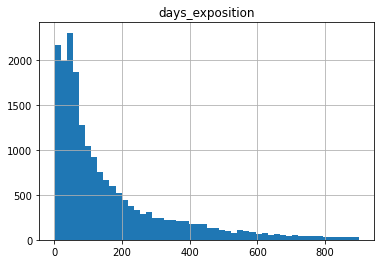

In [58]:
#строим гистограмму
data.hist('days_exposition', bins=50, range=(1,900))
#считаем среднее и медиану
print('среднее:', int(data['days_exposition'].mean()))
print('медиана:',int(data['days_exposition'].median()))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

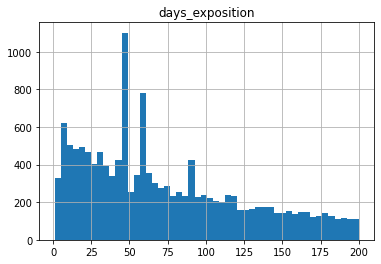

In [59]:
data.hist('days_exposition', bins=50, range=(1,200))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

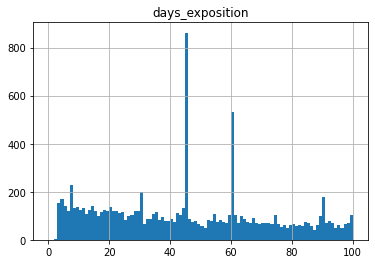

In [60]:
data.hist('days_exposition', bins=100, range=(0,100))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

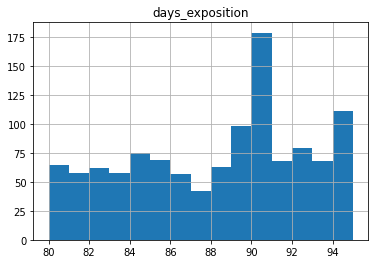

In [61]:
data.hist('days_exposition', bins=15, range=(80,95))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

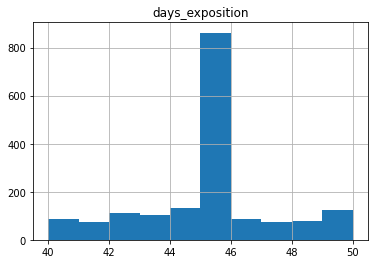

In [62]:
data.hist('days_exposition', bins=10, range=(40,50))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

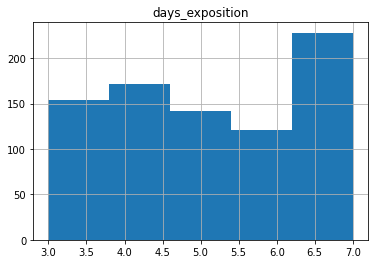

In [63]:
data.hist('days_exposition', bins=5, range=(3,7))

<AxesSubplot:>

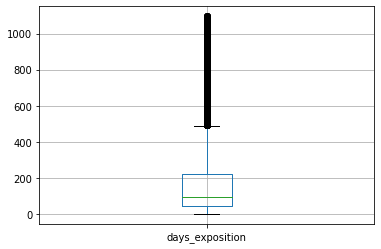

In [64]:
data.boxplot('days_exposition')

In [65]:
print('\n[Выбросы] Количество объявлений, которые сняты через:')
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = data['days_exposition'].astype('int') 
print('7 дней:',data.loc[data.loc[:,'days_exposition'] == 7]['days_exposition'].count())
print('30 дней:',data.loc[data.loc[:,'days_exposition'] == 30]['days_exposition'].count())
print('45 дней:',data.loc[data.loc[:,'days_exposition'] == 45]['days_exposition'].count())
print('60 дней:',data.loc[data.loc[:,'days_exposition'] == 60]['days_exposition'].count())
print('90 дней:',data.loc[data.loc[:,'days_exposition'] == 90]['days_exposition'].count())


[Выбросы] Количество объявлений, которые сняты через:
7 дней: 228
30 дней: 199
45 дней: 862
60 дней: 531
90 дней: 179


**Вывод:** в среднем время продажи составляет около 179 дней (примерно 5 месяцев)
Быстрыми можно считать продажи, которые закрылись до 90 дней.
Необычно долгие - свыше 179 дня.
Можно выделить несколько временных периодов, в которые продажи достигали больших значений: 
<ul>
<li>В течении 7 дней закрыто 228 объявления;
<li>30 дней: 199
<li>45 дней: 862
<li>60 дней: 531
<li>90 дней: 179</li></ul>
Можно предположить, что выбросы - платные объявления, так как  они закрывались через определенное время, схожее со средним временем подписок

#### Исследование факторов, влияющих на полную стоимость квартиры;

In [66]:
def floor_type_numb (floor):
    if floor['floors_total'] > 1:
        if floor['floor_type'] == 'последний' :
            return 2
        elif floor['floor_type'] == 'первый':
            return 0
        else:
            return 1
        
data['floor_type_numb'] = data.apply(floor_type_numb, axis =1)
data['floor_type_numb'].value_counts()

1.0    16666
2.0     3160
0.0     2798
Name: floor_type_numb, dtype: int64

In [67]:
list = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_type_numb',
                  'dayofweek_public',
                  'month_public',
                  'year_public']
for values in list :
    corr = data['last_price'].corr(data[values])
    print(f'корреляция между last_price и {values} составляет: {corr}')

корреляция между last_price и total_area составляет: 0.7816766160062717
корреляция между last_price и living_area составляет: 0.671068966529199
корреляция между last_price и kitchen_area составляет: 0.6072467694751963
корреляция между last_price и rooms составляет: 0.48482016007205536
корреляция между last_price и floor_type_numb составляет: 0.05530659993748228
корреляция между last_price и dayofweek_public составляет: -0.02005599488051998
корреляция между last_price и month_public составляет: 0.003412998559605064
корреляция между last_price и year_public составляет: -0.0253650621521579


<div class="alert alert-info">
<b>Вывод:</b> Корреляция нам показывает наличие линейной связи между last_price и характеристиками квартиры. У значений площади (общей\жилой и кухни)  и кол-во комнат коэффициент положительный и в некоторых случая близок к 1, это означает, что с ростом первой величины растет и вторая. В остальных случаях корреляция близка к 0, это значит что первый парметр меняется, а второй нет.


Для параметров, которые показали положительную зависимость построим диаграмму рассеяния 

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

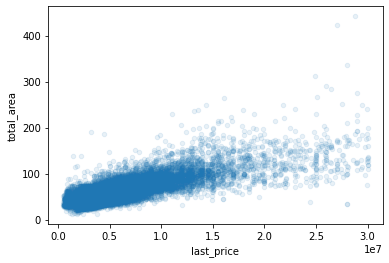

In [68]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)

Диаграмма подтверждает зависимость, так как точки расположены тесно к линии, то зависимость сильная

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

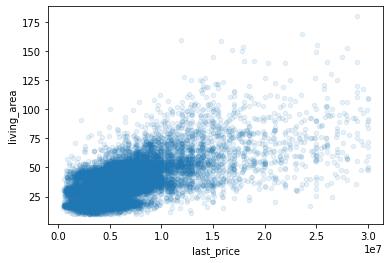

In [69]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)

Большинстов значений скопилось в одном месте, но зависимость просматривается, похоже на слабую положительную корреляцию

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

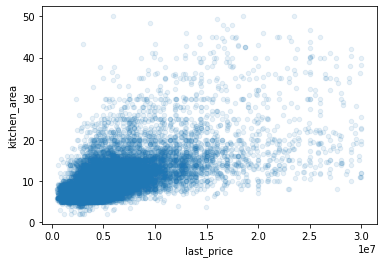

In [70]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)

На данной диаграмме больше, чем на предыдущих видно, что есть значения не поддающиеся зависимости, но тенденци к росту цены от роста площади на кухне просматривается, но корреляция слабая

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

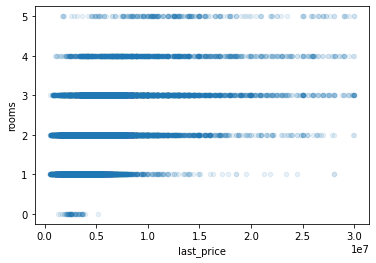

In [71]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)

<AxesSubplot:xlabel='rooms'>

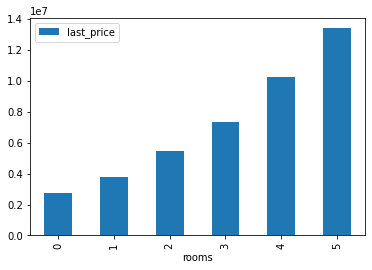

In [72]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

График наглядно показывает, что зависимость есть, чем больше комнат, тем выше цена.  Можем предположить что корелляция всего 50 процентов, потому, что значений с большим (4 и 5) количестовм комнат меньше

<AxesSubplot:xlabel='last_price', ylabel='floor_type_numb'>

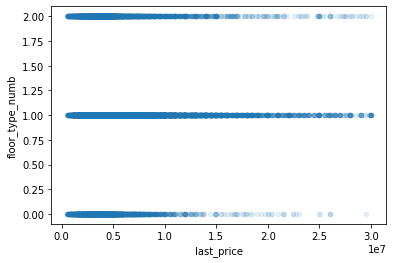

In [73]:
data.plot(x='last_price', y='floor_type_numb', kind='scatter', alpha=0.1);

<AxesSubplot:xlabel='floor_type'>

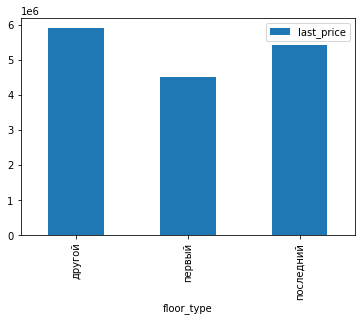

In [74]:
data.pivot_table(index='floor_type',values='last_price').plot(y='last_price', kind='bar');

Дешевле всего покупать квартиру на первом этаже, а вот самые дорогие квартиры находятся на других этажах, не косаясь последнего

<AxesSubplot:xlabel='year_public'>

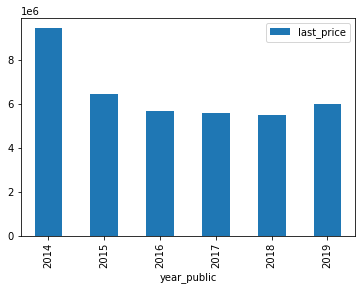

In [75]:
data.pivot_table(index='year_public',values='last_price').plot(y='last_price', kind='bar');

В 2014 году средняя стоимость продаваемых квартир была наибольшей. В последующих годах средняя стоимость была одинаковой и не привышала 7 млн руб. На это могло повлиять изменение характеристик продаваемых квартир или количество.

**Вывод**

В ходе расчета корреляции между ценой и параметрами квартиры удалось выяснить, что самая большая зависимость от
<ul>
<li>общей площади, корреляция составила 78.17%, близка к 100% </li>
    Далее по убыванию перечислим другие параметры и их взаимную зависимость с ценой (в процентах)
<li>жилая площадь - 67.11%
<li>площадь кухни - 60.72%
<li>количества комнат 48.48% </li></ul>
Цена практически на зависит от:
<ul>
<li>этажа, на котором расположена квартира;
<li>дня, месяца и года размещения объявления</li></ul>

#### Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра


In [76]:
locality_max_abs = data.pivot_table(index='locality_name', values=['last_price','total_area'],aggfunc=['sum','count'])
locality_max_abs.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']

locality_max_abs.sort_values(by=['last_price_count'],ascending=False, inplace=True)
locality_max_abs = locality_max_abs.iloc[:10]

locality_max_abs['price_per_sqm'] = round(locality_max_abs['last_price_sum']/locality_max_abs['total_area_sum'])
locality_max_abs.sort_values(by=['price_per_sqm'], ascending=False, inplace=True)
print(locality_max_abs)

                   last_price_sum  total_area_sum  last_price_count  \
locality_name                                                         
Санкт-Петербург      100966478427       903190.68             14907   
Пушкин                 2192547964        20902.50               355   
деревня Кудрово        1245883220        13714.85               292   
поселок Парголово      1448200459        16519.37               322   
поселок Мурино         1960512930        23663.79               530   
поселок Шушары         1786855999        23469.96               433   
Колпино                1294830246        17539.32               335   
Гатчина                1070919360        15639.48               307   
Всеволожск             1485349965        21954.33               388   
Выборг                  759683000        13123.56               234   

                   total_area_count  price_per_sqm  
locality_name                                       
Санкт-Петербург               14907      

Получилось, что самый дорогой квадратный метр продается в самом Санкт-Петербурге, его цена в среднем составиляет 111855 рублей. Далее по убыванию идут туристические города и ближайшие деревни и поселки.



#### Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

-0.8426499492903353


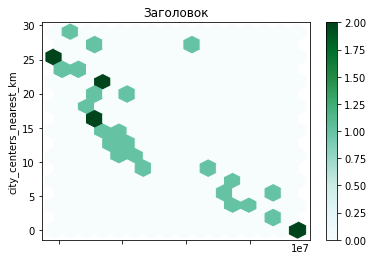

In [77]:
spb_price_km = data.query("locality_name == 'Санкт-Петербург'")
spb_price_km = spb_price_km.pivot_table(index='city_centers_nearest_km', values=['last_price'], aggfunc='mean')

spb_price_km.columns=["last_price_mean"]
spb_price_km['city_centers_nearest_km'] = np.arange(spb_price_km.shape[0])


correlation = spb_price_km["city_centers_nearest_km"].corr(spb_price_km['last_price_mean'])
print(correlation)
spb_price_km.plot(kind='hexbin',x='last_price_mean', y='city_centers_nearest_km', gridsize=15, title = 'Заголовок');


Большую среднюю цену имеют квартиры расположенные ближе к центру. Дальше с увиличением расстояния цена убывает, пока не доходит до пика в 15 и 27 км, возможно, высокая цена связана с какими-то особенностями местности (элитное жилье\достопримечательности) или на этом расстояние находится уже другой город. 

Не считая выбросов, можно сказать, что чем дальше от центра находится квартира, тем дешевле ее стоимость, об этом так же свидетельствует отрицательный коэффициент корреляции -0.8 (расстояние увеличивается, цена уменьшается)

### Общий вывод

*Было проведено исследование по данным сервиса Яндекс Недвижимость, чтобы выявить зависимости, которые существуют на рынке недвижимости.
Входные данные – архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах (данные двух типов: добавленные пользователем и картографические).
Результаты исследования помогут учесть особенности продажи квартир и понять, за счет чего чаще всего формируется цена на квартиру.*

**В ходе выполнения данного проекта:**
Проведен обзор данных и выполнена предобработка данных, выявлены недостатки в данных, были обработаны пропуски, в некоторых случаях строки были удалены, так как их количество мало по сравнению со всей выбркой, в некоторых случаях мы предположили пользовательскую ошибку и заменили данные на возможные (высота потолков). При обработке, большинство значений максимальных и минимальных показателей выбивались из общего числа данных, поэтому мы обработали данные и получили следующие границы показателей квартиры:
<ol>
<li>Цена от 500.000 до 30.000.000 рублей </li>
<li>Общая и жилая площадь от 10 до 200 кв.м</li>
<li>В квартире максимум 5 комнат</li>
<li>Высоота потолков от 2.5 до 4 метров</li>
<li>Площадь кухни от 2 до 50 кв.м</li>
<li>Объявления, которые продавались менее 3-ёх лет</li>
</ol>

*Остальные показатели не выражали аномальных значений

**При проведение исследовательского анализа данных:**
<ul>
<li> Построены гистограммы по всем исследуемым параметрам квартиры
<li> Проведен анализ факторов, влияющих на полную стоимость квартиры
<li> Отобран топ 10 населенных пунктов с наибольшим числом объявлений и рассчитана средняя стоимость квадратного метра в этих пунктах
<li> Проведен анализ изменнения цены квартиры по удаленности от центра 
</ul>

**Вывод**
<ul><li><b>Большинство квартир имеют следующие параметры:</b>
   <ol> <li>от 30 до 60 кв.м общей площади
    <li>18 и 30 кв.м жилой площади
    <li>с площадью кухни от 5 до 12 квадратов
    <li>цена варьируется от 2500000 до 6000000 рублей
    <li>количестов комнат 2 или 3
    <li>с высотой потолков 2.5м
    <li>на этажах с 2 по 4, в  5-и этажных домах
    <li>на расстояние от 10 до 15 км от центра
    <li>в не зависимости от близости к аэропорту, но не ближе 10 км к нему
    <li>находятся на расстоянии от 200 до 700 метров от парка</li></ol>
    
<li>Период пиков количества закрытх объявлений по квартирам выпадал <b>на 45 и 60 дней</b>,  в такие промежутки времени были сняты объявления 862 и 531 квартиры соответственно. Это на 5% и 3% больше чем в среднем.Либо квартиры по истечению данного времени действительно продавались, или на сайте есть реклама по продвижению, после ее истечения, объявление скрывают</li>
      
<li><b>Так же мы выяснили от чего в большей степени (больше 50%) зависит цена на квартиру:</b><ol>
    <li> Чем больше площадь, тем дороже квартира, это подтверждает коэффициент корреляции почти близкий к 1 (0.8)       
    <li>Логично, что мы прослеживаем зависимость цены и жилой площади корреляция составила почти 0.7
    <li>так же при ценообразовнии роль имеет площадь кухни, чем она больше, тем выше цена</li></ol></li></ul>

 <ul>   <li>Выяснили, что самая высокая <b>стоимость 1 кв.м в Санкт-Петербурге и составляет 111855 рублей</b>
     <li>относительно центра стоимость значительно не меняется, но <b>в пределах 5км от центра наблюдается повышение цены до 20.000.000 рублей</b>. Так же подозрительными кажутся квартиры на расстояние 15, 20 и 27 км от центра, для более достоверного утверждения на счет этих расстояний, я бы предложила более подробно рассмотреть эти случаи.</ul>
         
 <b><i>Если обобщить, то получилось, что цена квартиры зависит от ее размера и расположения.</i></b>
 
 *Общие рекомедации*: Можно рассмотреть данные, показывающие есть ли зависимость между ценой и ее расположением относительно парков и прудов; влияет ли количество изображений на цену и скорость продажи,